In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline 

In [2]:
def get_mnist_data():
    df = pd.read_csv('../data/mnist/train.csv',header=None)
    data = df.iloc[1:].as_matrix()
    data = data.astype('int')
    Y = data[:,0]
    X = data[:,1:]/255.0
    return X,Y

In [3]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1,keepdims=True)

In [4]:
def cost(T,Y):
    return -(T*np.log(Y)).sum()

In [5]:
def y2indicator(Y):
    N = Y.shape[0]
    K = len(set(Y))
    Y_ind = np.zeros((N,K))
    for i in xrange(N):
        Y_ind[i,Y[i]] = 1
    return Y_ind

In [6]:
def error_rate(targets,predictions):
    return np.mean(targets != predictions)

In [7]:
def relu(x):
    return x*(x>0)

In [8]:
def forward(X,W1,b1,W2,b2):
#     Z = 1/(1 + np.exp(-X.dot(W1) + b1))
    Z = relu(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1,keepdims=True)
    return Y, Z

In [9]:
def classification_rate(Y,T):
    return np.mean(Y==T)

In [10]:
def derivative_w2(Z,T,Y):
    return Z.T.dot(T-Y)

In [11]:
def derivative_b2(T,Y):
    return (T-Y).sum(axis=0)

In [12]:
def derivative_w1(X, Z, T, Y, W2):
#     return X.T.dot((T-Y).dot(W2.T)*Z*(1-Z))
    return X.T.dot((T-Y).dot(W2.T)*(Z>0))

In [13]:
def derivative_b1(Z, T, Y, W2):
#     return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)
    return ((T-Y).dot(W2.T)*(Z>0)).sum(axis=0)

In [14]:
X,Y = get_mnist_data()

/Users/adnguyen/env/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

In [15]:
X_train = X[:-1000]
Y_train = Y[:-1000]
Y_train_ind = y2indicator(Y_train)
X_valid = X[-1000:]
Y_valid = Y[-1000:]
Y_valid_ind = y2indicator(Y_valid)

In [16]:
N,D = X_train.shape
K = len(set(Y_train))
M = 5
W1 = np.random.randn(D,M) / np.sqrt(D+M)
b1 = np.zeros(M)
W2 = np.random.randn(M,K) / np.sqrt(M+K)
b2 = np.zeros(K)
costs = []

epoch:  0 cost:  2258.83504704 error:  0.831
epoch:  100 cost:  1637.59399348 error:  0.548
epoch:  200 cost:  1115.55090501 error:  0.304
epoch:  300 cost:  833.849998364 error:  0.223
epoch:  400 cost:  704.573487433 error:  0.19
epoch:  500 cost:  633.440266108 error:  0.176
epoch:  600 cost:  588.401232002 error:  0.169
epoch:  700 cost:  557.123389671 error:  0.159
epoch:  800 cost:  534.066196872 error:  0.155
epoch:  900 cost:  516.386976318 error:  0.149
epoch:  1000 cost:  502.407817041 error:  0.147
epoch:  1100 cost:  491.097926699 error:  0.149
epoch:  1200 cost:  481.745213866 error:  0.146
epoch:  1300 cost:  473.873725789 error:  0.141
epoch:  1400 cost:  467.156874924 error:  0.139
epoch:  1500 cost:  461.348097576 error:  0.137
epoch:  1600 cost:  456.328747208 error:  0.135
epoch:  1700 cost:  451.993955896 error:  0.131
epoch:  1800 cost:  448.201921107 error:  0.132
epoch:  1900 cost:  444.763431867 error:  0.13
epoch:  2000 cost:  441.674483925 error:  0.128
epoch:

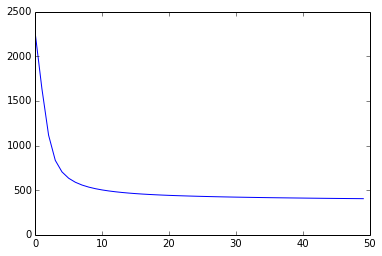

In [17]:
for epoch in xrange(5000):
    P_Y_given_X, hidden = forward(X_train,W1,b1,W2,b2)
    W2 += 1e-6*(derivative_w2(hidden,Y_train_ind,P_Y_given_X) + 1e-8*W2)
    b2 += 1e-6*(derivative_b2(Y_train_ind,P_Y_given_X) + 1e-8*b2)
    W1 += 1e-6*(derivative_w1(X_train,hidden,Y_train_ind,P_Y_given_X,W2) + 1e-8*W1)
    b1 += 1e-6*(derivative_b1(hidden,Y_train_ind,P_Y_given_X,W2) + 1e-8*b1)
    if epoch % 100 == 0:
        P_Y_valid, _ = forward(X_valid,W1,b1,W2,b2)
        c = cost(Y_valid_ind,P_Y_valid)
        costs.append(c)
        e = error_rate(Y_valid,np.argmax(P_Y_valid,axis=1))
        print "epoch: ", epoch, "cost: ", c, "error: ", e
plt.plot(costs)
plt.show()